# Introduction


With this data we are tasked with predicting the fare amount for a taxi ride in New York City given the pickup and Dropoff locations.

# Features

1. pickup-datetime:Date and time indicating when the taxi ride started.

2. pickup_longitude: Longitude coordinate of where the taxi ride started.

3. pickup_latitude : Latitude coordinate of where the taxi ride started.

4. dropoff_longitude : Longitude coordinate of where the taxi ride ended.

5. dropoff_latitude : Latitude coordinate of where the taxi ride ended.

6. passenger_count : Integer indicating the number of passengers in the taxi ride.

# Target

fare_amount - float dollar amount of the cost of the taxi ride.

# Lets Get Started!!!  :)

# Importing the Libraries

In [1]:
#IMPORTING THE PACKAGES
import pandas as pd
import numpy as np
import scipy
from scipy.stats import spearmanr

import sklearn

import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings("ignore")

# Importing the Data

In [2]:
#IMPORTING THE CSV FILE.
data = pd.read_csv("NYCTaxiFares.csv")


# Reading the Data

In [3]:
#FIRST FIVE ROWS
data.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2010-04-19 08:17:56 UTC,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1
1,2010-04-17 15:43:53 UTC,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1
2,2010-04-17 11:23:26 UTC,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2
3,2010-04-11 21:25:03 UTC,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1
4,2010-04-17 02:19:01 UTC,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1


In [4]:
#LAST FIVE ROWS
data.tail()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
119995,2010-04-18 14:33:03 UTC,15.3,1,-73.955857,40.784590,-73.981941,40.736789,1
119996,2010-04-23 10:27:48 UTC,15.3,1,-73.996329,40.772727,-74.049890,40.740413,1
119997,2010-04-18 18:50:40 UTC,12.5,1,-73.988574,40.749772,-74.011541,40.707799,3
119998,2010-04-13 08:14:44 UTC,4.9,0,-74.004449,40.724529,-73.992697,40.730765,1
119999,2010-04-17 16:00:14 UTC,5.3,0,-73.955415,40.771920,-73.967623,40.763015,3


# Exploratory Data Analysis

In [5]:
#FINDING THE ROWS AND COLUMNS
data.shape

(120000, 8)

In [6]:
#GETTING THE INFORMATION ABOUT THE DATA.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   pickup_datetime    120000 non-null  object 
 1   fare_amount        120000 non-null  float64
 2   fare_class         120000 non-null  int64  
 3   pickup_longitude   120000 non-null  float64
 4   pickup_latitude    120000 non-null  float64
 5   dropoff_longitude  120000 non-null  float64
 6   dropoff_latitude   120000 non-null  float64
 7   passenger_count    120000 non-null  int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 7.3+ MB


In [7]:
#CHECKING THE DATATYPE.
data.dtypes

pickup_datetime       object
fare_amount          float64
fare_class             int64
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [8]:
#FINDING THE HEADINGS OF THE COLUMNS
data.columns

Index(['pickup_datetime', 'fare_amount', 'fare_class', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count'],
      dtype='object')

In [9]:
#CHECKING IF THERE IS ANY NULL VALUE IN ANY ROW OR COLUMN.
data.isnull().sum()

pickup_datetime      0
fare_amount          0
fare_class           0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [10]:
#FINDING THE UNIQUE VALUES
data.nunique()

pickup_datetime      120000
fare_amount             414
fare_class                2
pickup_longitude      55583
pickup_latitude       63302
dropoff_longitude     59064
dropoff_latitude      67362
passenger_count           5
dtype: int64

In [11]:
#DESCRIBING THE DATA
#Finding the counts,means,standard deviation,minimum,maximum,quartiles.
data.describe()

,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000
mean,10.040326,0.333333,-73.976626,40.751443,-73.974501,40.751695,1.347167
std,7.500134,0.471406,0.031497,0.025821,0.032419,0.030279,0.759263
min,2.500000,0.000000,-74.465447,40.121653,-74.443323,40.164927,1.000000
25%,5.700000,0.000000,-73.992386,40.736594,-73.991478,40.735914,1.000000
50%,7.700000,0.000000,-73.982084,40.753661,-73.980411,40.754441,1.000000
75%,11.300000,1.000000,-73.968710,40.768020,-73.965500,40.768880,1.000000
max,49.900000,1.000000,-73.311845,40.981292,-73.496140,40.993498,5.000000


In [12]:
#FINDING THE CORRELATION
data.corr()

,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
fare_amount,1.000000,0.690037,0.396492,-0.179085,0.413033,-0.164657,0.034072
fare_class,0.690037,1.000000,0.163574,-0.104847,0.220660,-0.101500,0.032022
pickup_longitude,0.396492,0.163574,1.000000,0.071137,0.287627,0.072225,-0.013618
pickup_latitude,-0.179085,-0.104847,0.071137,1.000000,0.074658,0.402102,-0.030190
dropoff_longitude,0.413033,0.220660,0.287627,0.074658,1.000000,0.165349,-0.007644
dropoff_latitude,-0.164657,-0.101500,0.072225,0.402102,0.165349,1.000000,-0.015962
passenger_count,0.034072,0.032022,-0.013618,-0.030190,-0.007644,-0.015962,1.000000


In [13]:
data.dtypes

pickup_datetime       object
fare_amount          float64
fare_class             int64
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

As we can see pickup_datetime is an object so we need to convert this into datetime format.
Also splitting datetime column to get day of week,month,year and time columns seperately.

In [14]:
#CONVERTING TO DATETIME FORMAT
data['pickup_datetime'] = pd.to_datetime(data['pickup_datetime'])

data['day_of_week'] = data['pickup_datetime'].dt.weekday

#DAY OF THE WEEK STARTS FROM 0-6, 0-SUNDAY to 6-SATURDAY IN PYTHON.
data.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,day_of_week
0,2010-04-19 08:17:56+00:00,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1,0
1,2010-04-17 15:43:53+00:00,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1,5
2,2010-04-17 11:23:26+00:00,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2,5
3,2010-04-11 21:25:03+00:00,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1,6
4,2010-04-17 02:19:01+00:00,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1,5


In [15]:
#REASSIGNING VALUES OF DAY FROM 0-6 TO 1-7 AS 0 VALUE AFFECTS THE COMPUTATION.
data['day_of_week'] = data['day_of_week'] +1
data.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,day_of_week
0,2010-04-19 08:17:56+00:00,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1,1
1,2010-04-17 15:43:53+00:00,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1,6
2,2010-04-17 11:23:26+00:00,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2,6
3,2010-04-11 21:25:03+00:00,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1,7
4,2010-04-17 02:19:01+00:00,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1,6


# Making New Columns

In [16]:
#RETRIVING HOUR,MONTH,YEAR FROM DATETIME AND ADDING THEM IN NEW COLUMN.
data['hour'] = data['pickup_datetime'].dt.hour
data['month'] = data['pickup_datetime'].dt.month
data['year'] = data['pickup_datetime'].dt.year
data.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,day_of_week,hour,month,year
0,2010-04-19 08:17:56+00:00,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1,1,8,4,2010
1,2010-04-17 15:43:53+00:00,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1,6,15,4,2010
2,2010-04-17 11:23:26+00:00,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2,6,11,4,2010
3,2010-04-11 21:25:03+00:00,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1,7,21,4,2010
4,2010-04-17 02:19:01+00:00,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1,6,2,4,2010


In [17]:
#EXPLORING THE DATA
print(data['hour'].unique())
print(data['day_of_week'].unique())
print(data['month'].unique())
print(data['year'].unique())

[ 8 15 11 21  2 19  9 18 22 17 12 10 23  1 13 16 14  0 20  3  7  4  6  5]
[1 6 7 4 5 2 3]
[4]
[2010]


Dropping month and year as all observations are of one month and one year. And dropping datatime,pickup_latitude,pickup_longitude,dropoff_latitude and dropoff_longitude columns as we have already stored required data from it into seperate columns

# Installing geopy package to findout the distance in km

In [18]:
#INSTALLING GEOPY TO CALCULATE THE DISTANCE
!pip install geopy;

Calculating distance from pickup - latitude,longitude and dropoff - latitude,longitude for all the observations

In [19]:
#CALCULATING THE DISTANCE IN KMS.
import geopy.distance

distance_kms = []
for index,row in data.iterrows():
    coords_1 = (row['pickup_latitude'],row['pickup_longitude'])
    coords_2 = (row['dropoff_latitude'],row['dropoff_longitude'])
    dist = geopy.distance.distance(coords_1, coords_2).km
    distance_kms.append(dist)

data['distance_kms'] = distance_kms
data.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,day_of_week,hour,month,year,distance_kms
0,2010-04-19 08:17:56+00:00,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1,1,8,4,2010,2.127192
1,2010-04-17 15:43:53+00:00,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1,6,15,4,2010,1.395425
2,2010-04-17 11:23:26+00:00,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2,6,11,4,2010,3.331977
3,2010-04-11 21:25:03+00:00,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1,7,21,4,2010,1.867152
4,2010-04-17 02:19:01+00:00,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1,6,2,4,2010,7.249240


# Dropping the Data

Dropping month and year as all observations are of one month and one year. Also dropping datetime,pickup_latitude,pickup_longitude,dropoff_latitude and dropoff_longitude columns as we have already stored required data from it into seperate columns.

In [20]:
#DROPING UNWANTED COLUMNS.
data = data.drop(['pickup_datetime','month','year','pickup_latitude','pickup_longitude','dropoff_latitude','dropoff_longitude'],axis = 1)
data.head()

,fare_amount,fare_class,passenger_count,day_of_week,hour,distance_kms
0,6.5,0,1,1,8,2.127192
1,6.9,0,1,6,15,1.395425
2,10.1,1,2,6,11,3.331977
3,8.9,0,1,7,21,1.867152
4,19.7,1,1,6,2,7.249240


In [21]:
#PER HOUR VALUE COUNT OF CAB DEMANDS.
data.hour.value_counts()

19    7100
18    6972
20    6731
21    6487
22    6358
17    5994
14    5928
15    5849
13    5766
12    5730
8     5655
23    5652
9     5649
11    5420
10    5349
16    5136
7     4665
0     4664
1     3573
2     2893
6     2855
3     2237
4     1768
5     1569
Name: hour, dtype: int64

As our data is now coverted according to our need. Now we can create models from the data

# Visualisation of the data

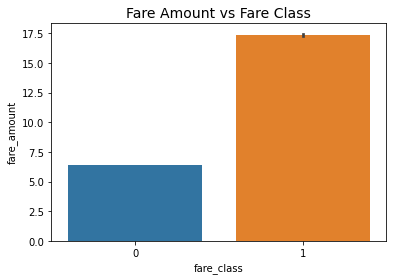

In [22]:
#CREATING THE BAR PLOT
sb.barplot(data=data, x = "fare_class", y = "fare_amount")
plt.title("Fare Amount vs Fare Class", fontsize = 14)
plt.show()

By this we can say that fare_class 1 has more fare compare to fare_class 0.

In [23]:
#PER HOUR CABS IN DEMAND.
data.groupby("hour")["hour"].agg("count")

hour
0     4664
1     3573
2     2893
3     2237
4     1768
5     1569
6     2855
7     4665
8     5655
9     5649
10    5349
11    5420
12    5730
13    5766
14    5928
15    5849
16    5136
17    5994
18    6972
19    7100
20    6731
21    6487
22    6358
23    5652
Name: hour, dtype: int64

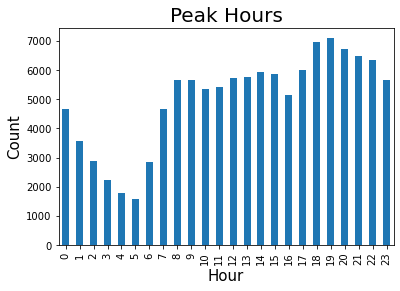

In [24]:
#CALCULCULATING THE PEAK HOURS.
data.groupby("hour")["hour"].agg("count").plot(kind="bar")

plt.xlabel("Hour", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.title("Peak Hours", fontsize=20)
plt.show()

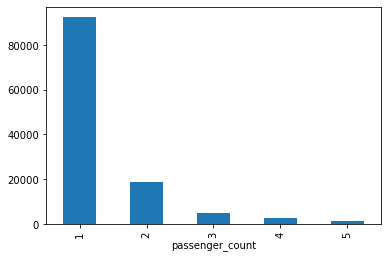

In [25]:
#CREATING BAR GRAPH FOR NUMBER OF PASSENGERS
data.groupby("passenger_count")["passenger_count"].agg("count").plot(kind="bar");

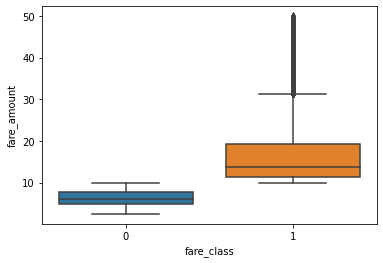

In [26]:
#CREATING BOX PLOT
sb.boxplot(x="fare_class",y='fare_amount' , data = data)
plt.show()

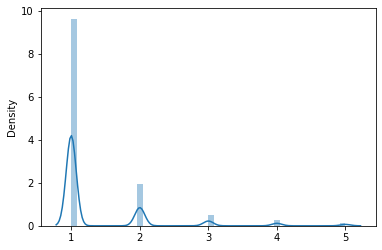

In [27]:
sb.distplot(x=data['passenger_count']);

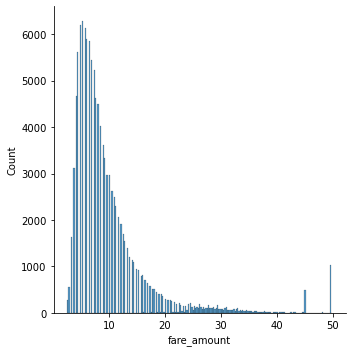

In [28]:
sb.displot(x=data['fare_amount']);

Here we can see that fareclass 1 has a median between 10 and 20,whereas fareclass 0 has median near to 10.Also,there are outliers in fareclass 1.

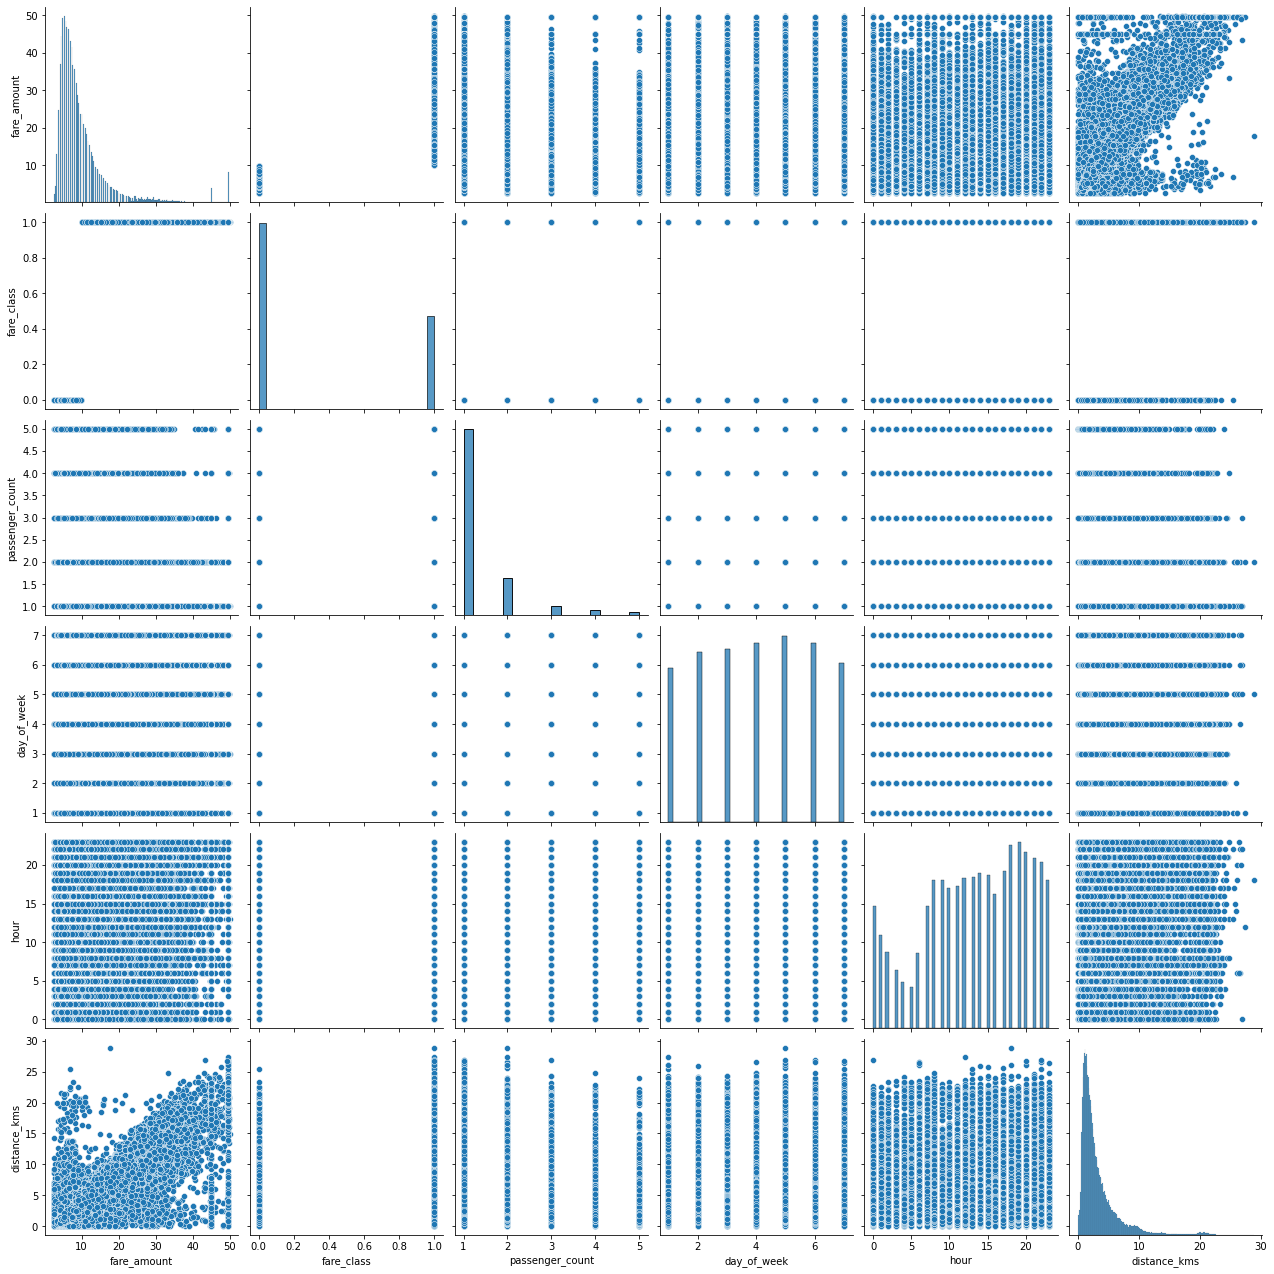

In [29]:
#CREATING PAIRPLOT FOR ALL THE ATTRIBUTES.
sb.pairplot(data=data, height = 3)
plt.show()

We can see the scatterdiagram showing pattern with respective attributes.

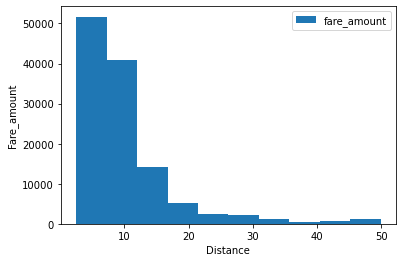

In [30]:
#CREATING THE HISTOGRAM
data.plot(y="fare_amount",x="distance_kms",kind="hist")
plt.ylabel("Fare_amount")
plt.xlabel("Distance");

Here we can see that as the distance is increasing the fare amount is decreasing.

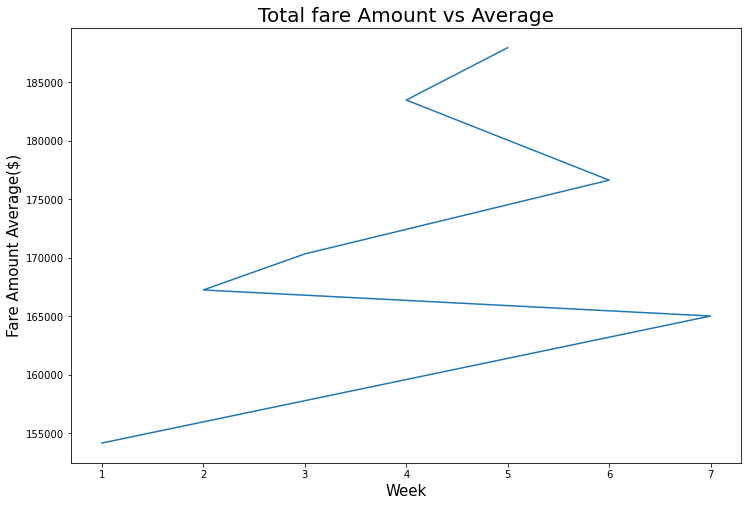

In [31]:
#LINE GRAPH SHOWING TREND TOTAL FARE AMOUNT PER DAY.
plt.figure(figsize = (12,8))
data.groupby("day_of_week")["fare_amount"].sum().sort_values().plot()

plt.xlabel("Week", fontsize=15)
plt.ylabel("Fare Amount Average($)", fontsize=15)
plt.title("Total fare Amount vs Average", fontsize=20)
plt.show()

By this graph we can see that in the starting of the week the fare are generally low, when we reach to weekend the amount of fare also increases.

In [32]:
#TAKING REFERENCE FOR THE COLUMN NAME.
data.columns

Index(['fare_amount', 'fare_class', 'passenger_count', 'day_of_week', 'hour',
       'distance_kms'],
      dtype='object')

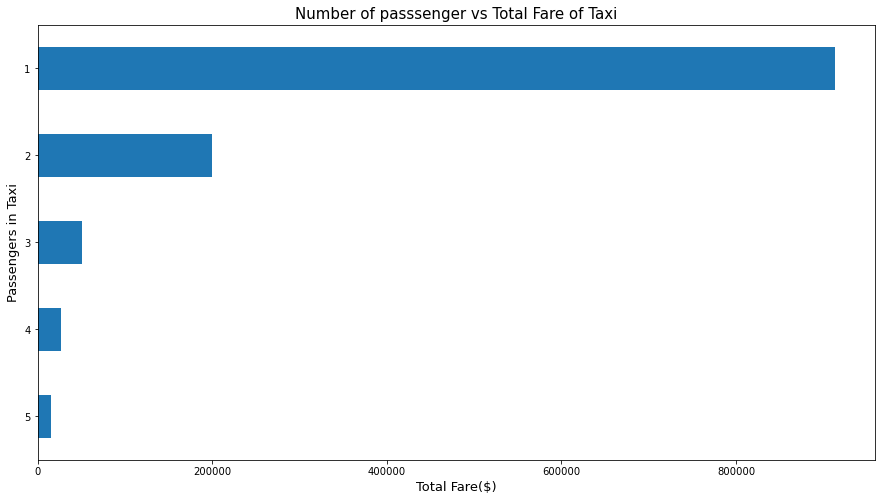

In [33]:
#CREATING HISTOGRAM 
plt.figure(figsize=(15,8))
data.groupby("passenger_count")["fare_amount"].sum().sort_values().plot.barh()
plt.xlabel("Total Fare($)",fontsize =13)
plt.ylabel("Passengers in Taxi", fontsize =13)
plt.title("Number of passsenger vs Total Fare of Taxi", fontsize = 15)
plt.show()

We can see that as the number of passenger is less the fare is higher and as the number of passengers increases the fare for the Taxi drecreases.

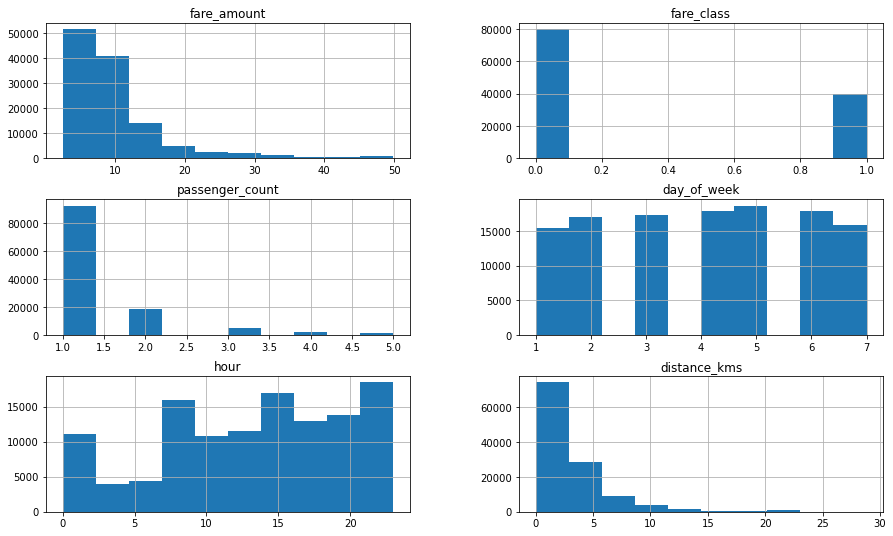

In [34]:
data.hist(figsize=(15,9));

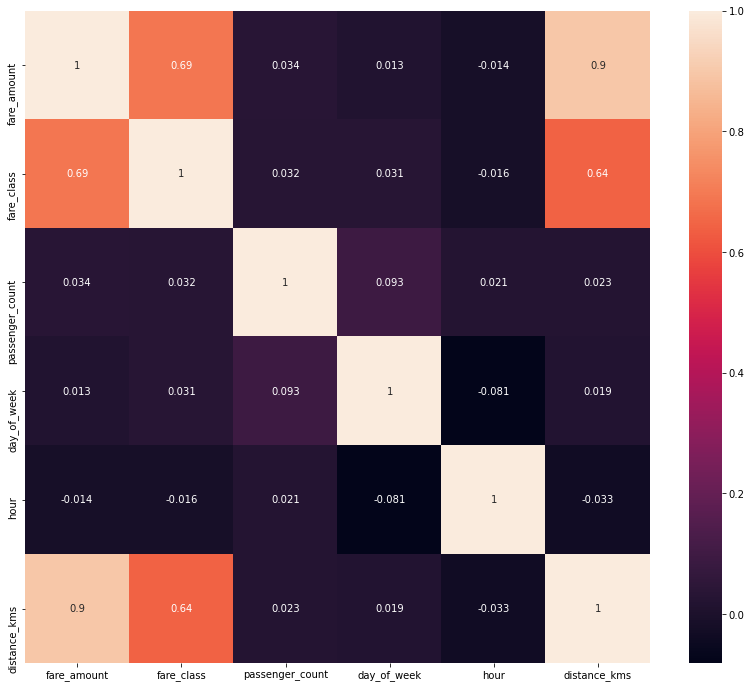

In [35]:
#PLOTTING HEATMAP WITH CORRELATION.
plt.figure(figsize=(14,12))
sb.heatmap(data.corr(),annot=True);

Above figure shows the correlation between differnt attributes. 

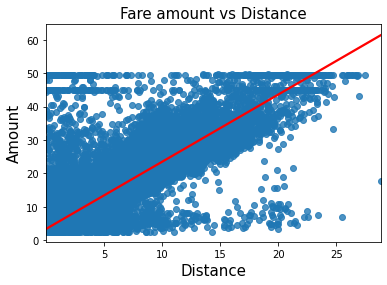

In [36]:
#CREATING THE REGRESSION LINE
sb.regplot(y=data['fare_amount'],x=data['distance_kms'],line_kws={'color': 'red'})
plt.title('Fare amount vs Distance',size=(15))
plt.ylabel('Amount',size=15)
plt.xlabel('Distance',size=15)
plt.show()

Above diagram shows the Regression line between Distance and the fare.

# Let's Deep Dive ;)

As we know that our target variable is fare amount charged by the cabs.And fare charges are continuous variable.Now we are going to do supervised machine learning.
Wherein there are 3 algorithems which are Linear Regression,Random Forest Regressor and Decision tree Regressor.

So, we are going to use these three one by one and check the accuracy of the same.

# Splitting the data into test and train data

In [37]:
#SPLITTING THE DATA INTO TRAIN AND TEST DATA
from sklearn.model_selection import train_test_split
y = data['fare_amount'].values
x = data.drop(columns=['fare_amount'],axis=1).values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=0)

In [38]:
#CHECKING HOW MUCH DATA IS IN TEST AND TRAIN DATA
print(f"Rows in train set: {len(x_train)}\nRows in test set: {len(x_test)}\n")

Rows in train set: 80400
Rows in test set: 39600



LINEAR REGRESSION

In [39]:
#PERFORMING THE LINEAR REGRESSION ON TRAINED DATA
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
model = lin_reg.fit(x_train,y_train)
y_pred=model.predict(x_test)

In [40]:
#CALCULATING R SQUARE
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.821344867506653

ACCURACY IS AROUND 82.13%

In [41]:
#CALCULATING THE MEAN SQUARE ROOT FOR LINEAR REGRESSION
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test,y_pred)
rootmeansq = np.sqrt(mse)
print("Mean Square Error  ",mse)
print("Root Mean Square  ",rootmeansq)

Mean Square Error   9.96817620684133
Root Mean Square   3.15724186701642


Mean Square error in Linear Regression is close to 10

In [42]:
#CORRELATION WITH FARE AMOUNT
corr_matrix = data.corr() 
corr_matrix['fare_amount'].sort_values(ascending=False)

fare_amount        1.000000
distance_kms       0.896355
fare_class         0.690037
passenger_count    0.034072
day_of_week        0.013008
hour              -0.013644
Name: fare_amount, dtype: float64

DECISION TREE REGRESSION

In [43]:
#APPLYING DECISION TREE 
from sklearn.tree import DecisionTreeRegressor
dt_reg = DecisionTreeRegressor(criterion='mse', max_depth=None, random_state=42)
dt_reg.fit(x_train, y_train)

DecisionTreeRegressor(random_state=42)

In [44]:
#PERFORMING R SQUARE
pred = dt_reg.predict(x_test)
r2_score(y_test, pred)

0.7675285834188045

ACCURACY IS AROUND 76.75%

In [45]:
#CALCULATING THE MEAN SQUARE ROOT FOR DECISION TREE REGRESSOR
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test,pred)
rootmeansq = np.sqrt(mse)
print("Mean Square Error  ",mse)
print("Root Mean Square  ",rootmeansq)

Mean Square Error   12.970889843434344
Root Mean Square   3.601512160667286


Mean Square Error in Decision Tree Regressor is close to 12, which is more than Linear regression.

RANDOM FOREST REGRESSION

In [46]:
#APPLYING RANDOM FOREST
from sklearn.ensemble import RandomForestRegressor
rfreg = RandomForestRegressor(n_estimators = 15)
rfreg.fit(x_train,y_train)

RandomForestRegressor(n_estimators=15)

In [48]:
#DEFINING PREDICT
predict = rfreg.predict(x_test)

In [49]:
#PERFORMING R SQUARE
r2_score(y_test, predict)

0.8527326285581047

ACCURACY IS AROUND 85.53%

In [50]:
#CALCULATING THE MEAN SQUARE ROOT FOR RANDOM FOREST REGRESSOR
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test,predict)
rootmeansq = np.sqrt(mse)
print("Mean Square Error  ",mse)
print("Root Mean Square  ",rootmeansq)

Mean Square Error   8.21687621040404
Root Mean Square   2.86650941223015


Mean Square Error in Random Forest is 8 which is less than Linear Regression as well as Decision Tree Regressor.

# Conclusion

As we run all three Algorithms, we are now able to decide which algorithm is best fit for the prediction of the fare amount.

Accuracy of all the algorithms is as follows:

In [51]:
print("Linear Regression = 82.13%")
print("Decision Tree Regression = 76.75%")
print("Random Forest Regression = 85.53%")

Linear Regression = 82.13%
Decision Tree Regression = 76.75%
Random Forest Regression = 85.53%


Random Forest is giving somewhat better results as compare to Linear regression and Decision Tree. So Random Forest is giving the best accuracy which is 85.53%.